# REAL ESTATE SALES ANALYSIS 

# Project Goal


Using multiple linear regression modeling to analyze house sales in a northwestern county.


## 1. OVERVIEW

- A brief overview of the business focusing on conducting regression analysis for house sales.
- It aims to explain the importance of regression analysis in understanding the factors that influence house prices and predicting future trends like waterfront and views.
- Highlighting the value that the business brings to clients by providing data-driven insights and accurate predictions.
- Conducts a market analysis to identify the target market for the regression analysis services.
- Analyze the demand for real estate market insights and the need for accurate predictions

# Business Understanding

## a.) Introduction 

- The business specializes in providing regression analysis services for house sales. It understands the importance of utilizing data-driven insights to understand the factors that influence house prices and predict future trends accurately. By conducting thorough market analysis, the business identifies the target market and the demand for real estate market insights and predictions.

- Overall, the business understands the significance of regression analysis in the context of house sales. It leverages data, statistical expertise, and predictive modeling to provide valuable insights to clients, enabling them to make informed decisions in the dynamic real estate market in Northwestern county.

## b.) Problem Statement 

- The real estate industry faces the challenge of accurately understanding the factors that influence house prices and predicting future trends. Many stakeholders, including buyers, sellers, investors, and lenders, seek reliable insights to make informed decisions. However, the complexity of the market and the multitude of variables involved make it difficult to obtain accurate predictions and data-driven insights.
- There is a need for a specialized business that comprehends the intricacies of house sale regression analysis. Such a business should possess a deep understanding of the real estate market, employ robust methodologies for data collection and analysis, develop accurate regression models, and deliver clear and understandable reports to clients.

- By addressing these challenges, the business can provide reliable predictions of house prices, identify significant factors influencing the market, and offer actionable insights to clients. This will empower stakeholders to make informed decisions, mitigate risks, optimize investments, and maximize returns in the dynamic real estate industry.

## c.) Main Objective 

The primary focus is on delivering value to clients by:

- Predicting House Prices: Developing robust regression models that consider various factors such as location, size, amenities, and market trends to accurately predict house prices. The objective is to provide clients with reliable estimates of property values, empowering them to make informed buying, selling, or investment decisions.

- Identifying Market Influencers: Analyzing the data to identify significant factors that impact the real estate market, such as economic indicators, neighborhood characteristics, interest rates, and supply and demand dynamics. The objective is to help clients understand the key drivers of property values and recognize emerging trends.

- Ensuring Data Accuracy and Reliability: Implementing robust data collection, cleaning, and preprocessing methodologies to ensure the accuracy and reliability of the data used in the regression analysis. The objective is to provide clients with reliable and trustworthy insights to support their decision-making processes.

- Building Strong Client Relationships: Prioritizing client needs and fostering strong relationships to understand their specific requirements and tailor analysis and insights accordingly. The objective is to provide personalized services and cultivate long-term collaborations and repeat business.

## d.) Specific Objective

- Providing Actionable Insights: Presenting findings and insights in clear and understandable reports, customized based on client requirements. The objective is to provide clients with actionable recommendations that enable them to optimize their real estate strategies, mitigate risks, and maximize returns.

## e.) Experimental Design

1. Data Collection
2. Data cleaning
3. Training the data
4. Modelling and Analysis
5. Conclusions and Recommendations

# Data Understanding 

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this git respiratory . The description of the column names can be found in column_names.md in the same folder. As with most real world data sets, the column names are not perfectly described so will figure out how to access this as we continue

Lets ignore some or all of the following features:

- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

## a.) Importing Data

Import for the data. 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## b.) Loading Data 

Okay lets load the data for the north western county preset

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\Moringa\Phase 2\Project 2\kc_house_data.csv")
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


## c.) Data Cleaning

### i.) Handling Missing Values

Deal with missing values in the data by dropping them in both column and rows

In [3]:
data = data.dropna()
data.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,7 Average,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,NO,NONE,...,7 Average,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,7 Average,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850


In [4]:
data = data.dropna(axis=1)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


Some of the data has question marks '?' it has to be replaced 

In [6]:
data.replace('?', 0.0, inplace=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


### ii.) Remove Unnecessary Columns

Now its has the necessary values in place. Next lets remove the columns and through combination we choose to ignore to make use for our modelling


In [7]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
# Specify the columns to be removed
remove_columns = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Remove existing columns
existing_columns = [col for col in remove_columns if col in data.columns]
data.drop(columns=existing_columns, inplace=True)

In [9]:
data.head(20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,Average,7 Average,1995
8,2414600126,229500.0,3,1.00,1780,7470,1.0,NO,Average,7 Average,1960
9,3793500160,323000.0,3,2.50,1890,6560,2.0,NO,Average,7 Average,2003
11,9212900260,468000.0,2,1.00,1160,6000,1.0,NO,Good,7 Average,1942
13,6054650070,400000.0,3,1.75,1370,9680,1.0,NO,Good,7 Average,1977
14,1175000570,530000.0,5,2.00,1810,4850,1.5,NO,Average,7 Average,1900


Now it has the relevant columns to use for modelling the data.

### iii.) Handling Categorical Values

In [10]:
data.info

<bound method DataFrame.info of                id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1      6414100192   538000.0         3       2.25         2570      7242   
3      2487200875   604000.0         4       3.00         1960      5000   
4      1954400510   510000.0         3       2.00         1680      8080   
5      7237550310  1230000.0         4       4.50         5420    101930   
6      1321400060   257500.0         3       2.25         1715      6819   
...           ...        ...       ...        ...          ...       ...   
21591  2997800021   475000.0         3       2.50         1310      1294   
21592   263000018   360000.0         3       2.50         1530      1131   
21593  6600060120   400000.0         4       2.50         2310      5813   
21594  1523300141   402101.0         2       0.75         1020      1350   
21596  1523300157   325000.0         2       0.75         1020      1076   

       floors waterfront  condition         grade  yr_b

### Feature Engineering 

Condition variable:

Convert the categorical levels into a numeric scale, assigning higher values to indicate better conditions. it can map 'Fair' to 1, 'Average' to 2, 'Good' to 3 and 'Very Good' to 4

In [11]:
condition_mapping = {'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
data['condition_encoded'] = data['condition'].map(condition_mapping)
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,condition_encoded
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,2.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,4.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,2.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001,2.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,Average,7 Average,1995,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008,2.0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,2.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,2.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,2.0


Grade variable:

If the grade represents an ordinal scale, map the grades to a numerical scale using label encoding or ordinal encoding. 
- 4 Low 1, 
- 5 Fair 2, 
- 6 Low Average 3,
- 7 Average 4, 
- 8 Good 5, 
- 9 Better 6, 
- 10 Very Good 7,
- 11 Excellent 8, 
- 12 Luxury 9

In [12]:
grade_mapping = {'4 Low': 1, '5 Fair': 2, '6 Low Average': 3, '7 Average': 4, '8 Good': 5, '9 Better': 6, '10 Very Good': 7, '11 Excellent': 8, '12 Luxury': 9}
data['grade_encoded'] = data['grade'].map(grade_mapping)
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,condition_encoded,grade_encoded
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,2.0,4.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,4.0,4.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,2.0,5.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001,2.0,8.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,Average,7 Average,1995,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008,2.0,5.0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,2.0,5.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,2.0,5.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,2.0,4.0


Waterfront variable:

Convert the 'waterfront' variable into a binary feature. Assign a value of 1 for properties with a waterfront view and 0 for properties without a waterfront view.

In [13]:
data['waterfront'] = data['waterfront'].map({'YES': 1, 'NO': 0})
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,condition_encoded,grade_encoded
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,1951,2.0,4.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1965,4.0,4.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1987,2.0,5.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,Average,11 Excellent,2001,2.0,8.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,Average,7 Average,1995,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,Average,8 Good,2008,2.0,5.0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,Average,8 Good,2009,2.0,5.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,Average,8 Good,2014,2.0,5.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,Average,7 Average,2009,2.0,4.0


Now the years built has been ranges to give it an easier approach when it comes to categorizing the discreteness of the data
range from
- 1900-1950 as 1
- 1951-1980 as 2
- 1981-2000 as 3
- 2001-2023 as 4

In [30]:
yr_built_mapping = {range(1900, 1951): 1, range(1951, 1981): 2, range(1981, 2001): 3, range(2001, 2024): 4}

# Apply the mapping to create a new column
data['yr_built_category'] = data['yr_built'].map(lambda x: next((v for k, v in yr_built_mapping.items() if x in k), None))
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,condition_encoded,grade_encoded,yr_built_category
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,1951,2.0,4.0,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1965,4.0,4.0,2
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1987,2.0,5.0,3
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,Average,11 Excellent,2001,2.0,8.0,4
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,Average,7 Average,1995,2.0,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,Average,8 Good,2008,2.0,5.0,4
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,Average,8 Good,2009,2.0,5.0,4
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,Average,8 Good,2014,2.0,5.0,4
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,Average,7 Average,2009,2.0,4.0,4


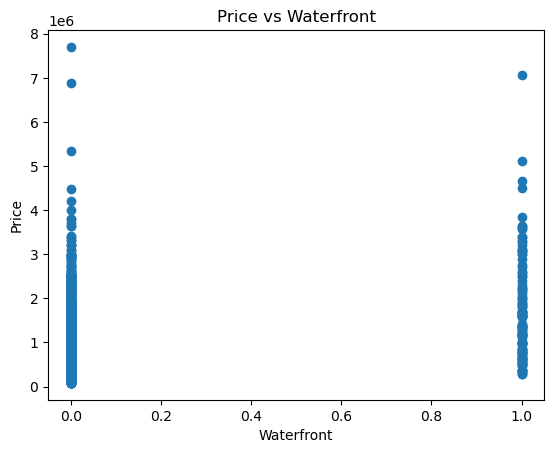

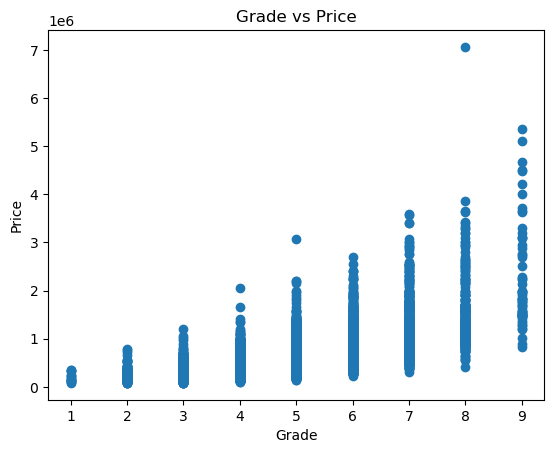

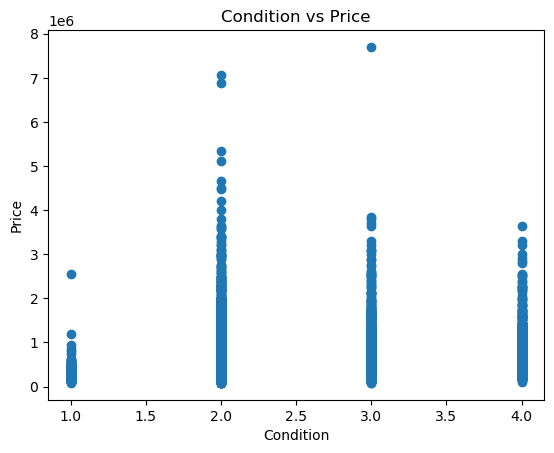

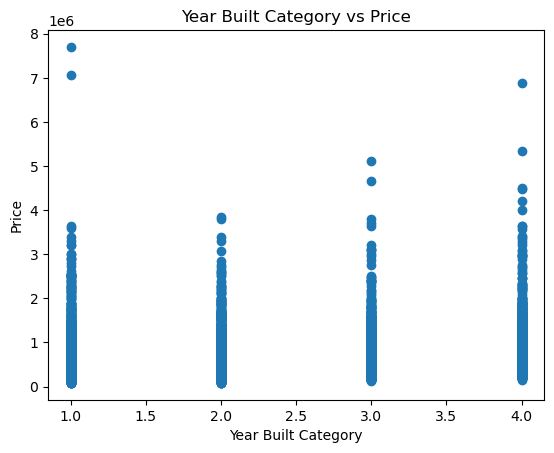

In [32]:
# Scatter plot for 'price' vs. 'waterfront'
plt.scatter(data['waterfront'], data['price'])
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Price vs Waterfront')
plt.show()
# Plot scatter plot of grade vs price
plt.scatter(data['grade_encoded'], data['price'])

plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Grade vs Price')

plt.show()
# Plot scatter plot of condition vs price
plt.scatter(data['condition_encoded'], data['price'])

plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Condition vs Price')
#scatter plot of year built category vs price
plt.show()
plt.scatter(data['yr_built_category'], data['price'])
plt.xlabel('Year Built Category')
plt.ylabel('Price')
plt.title('Year Built Category vs Price')
plt.show()

Now its been added features and confirmed the visualization for the changes.

### iv.) Handling outliers 

In [36]:
from scipy import stats

# Select the variable(s) to analyze for outliers
variable = 'price'

# Calculate z-scores for the variable
z_scores = np.abs(stats.zscore(data[variable]))

# Define a threshold for identifying outliers
threshold = 3

# Filter out the outliers
data_without_outliers = data[z_scores < threshold]

# Check the new dataset without outliers
data_without_outliers.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,condition_encoded,grade_encoded,yr_built_category
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,1951,2.0,4.0,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1965,4.0,4.0,2
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1987,2.0,5.0,3
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,Average,11 Excellent,2001,2.0,8.0,4
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,Average,7 Average,1995,2.0,4.0,3


### v.) Identify the numeric and categorical variables

Lets plot data using variables from continous numeric predictors like sqft_living, sqft_lot or yr_built 

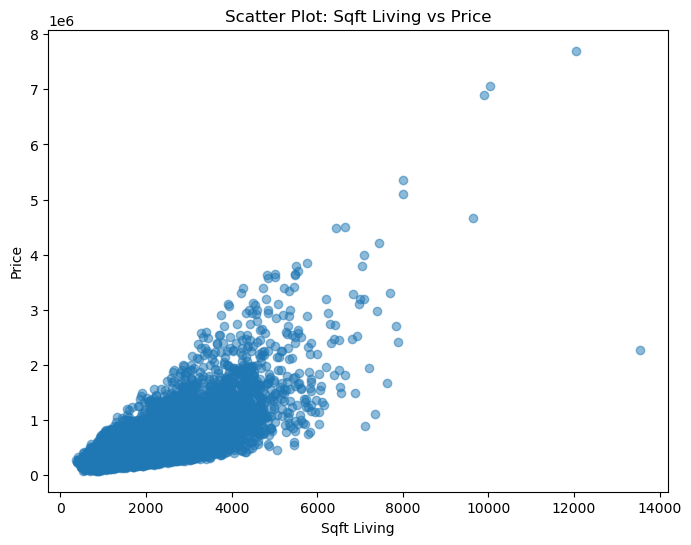

In [40]:
# Extract the variables for sqt_living plotting
sqft_living = data['sqft_living']
price = data['price']

# Create the scatter plot
sqft_living = data['sqft_living']
price = data['price']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sqft_living, price, alpha=0.5)

# Set labels and title
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Scatter Plot: Sqft Living vs Price')

# Show the plot
plt.show()

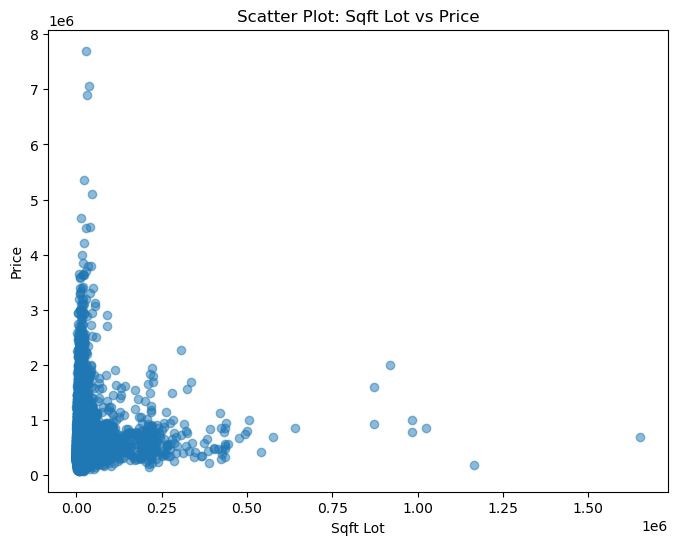

In [41]:
#Extract the variables for sqft_lot plotting 
sqft_lot = data['sqft_lot']
price = data['price']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sqft_lot, price, alpha=0.5)

# Set labels and title
plt.xlabel('Sqft Lot')
plt.ylabel('Price')
plt.title('Scatter Plot: Sqft Lot vs Price')

# Show the plot
plt.show()

In [42]:
# Extract the variables for plotting
yr_built = data['yr_built']
price = data['price']

Now it computes average for yr built 

In [43]:
# Compute the average price for each year
average_price_by_year = data.groupby('yr_built')['price'].mean()

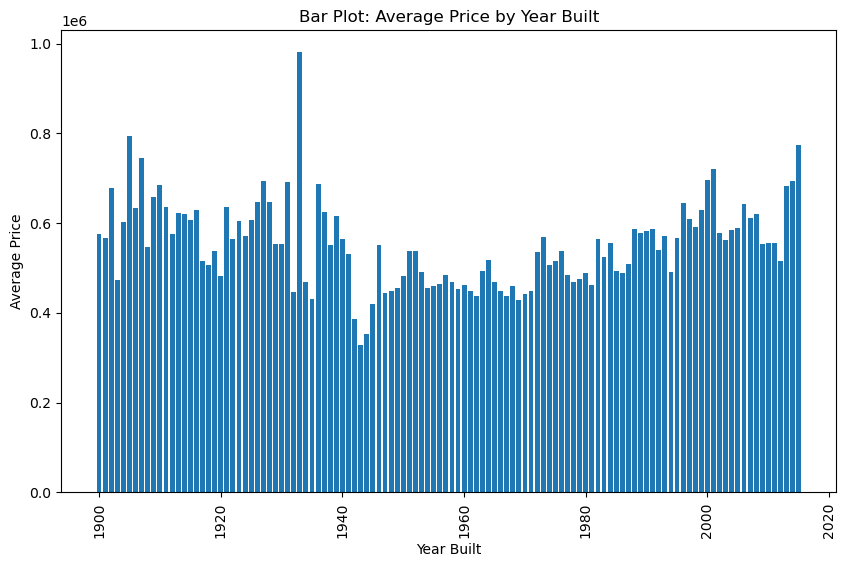

In [44]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_year.index, average_price_by_year.values)

# Set labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title('Bar Plot: Average Price by Year Built')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

For discrete numeric predictors such as bedrooms, bathrooms, floors and grade.

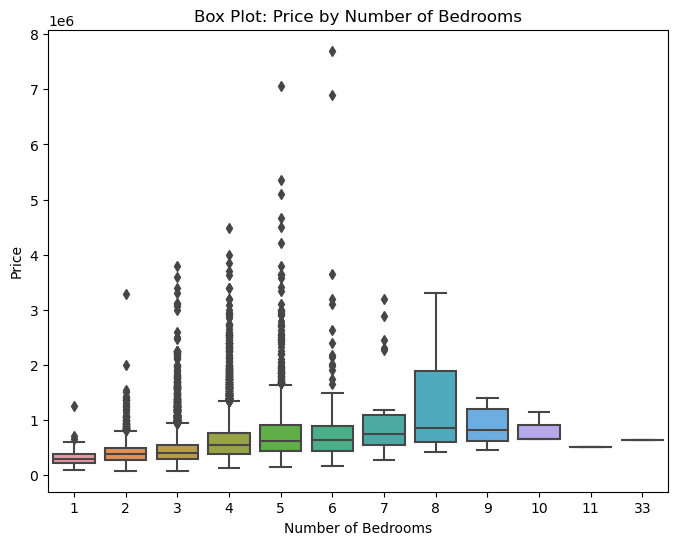

In [47]:
import seaborn as sns
# Create a box plot using Seaborn for bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', y='price', data=data)

# Set labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot: Price by Number of Bedrooms')

# Show the plot
plt.show()

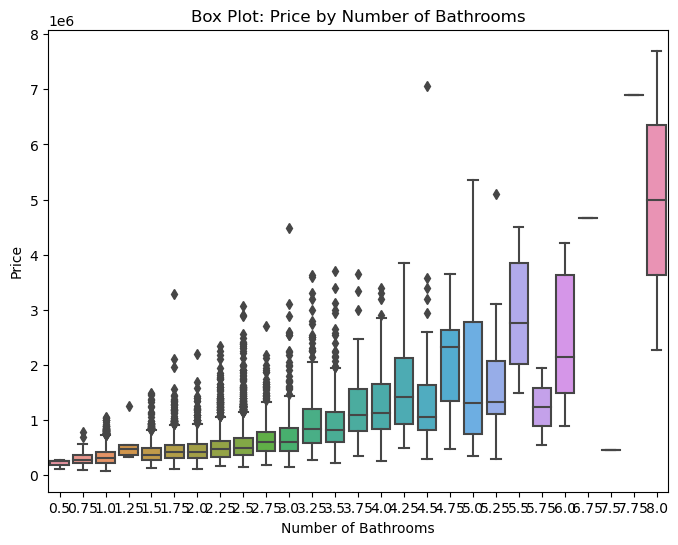

In [48]:
# Create a box plot using Seaborn for bathrooms
plt.figure(figsize=(8, 6))
sns.boxplot(x='bathrooms', y='price', data=data)

# Set labels and title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Box Plot: Price by Number of Bathrooms')

# Show the plot
plt.show()

it will uses the encoded grade 

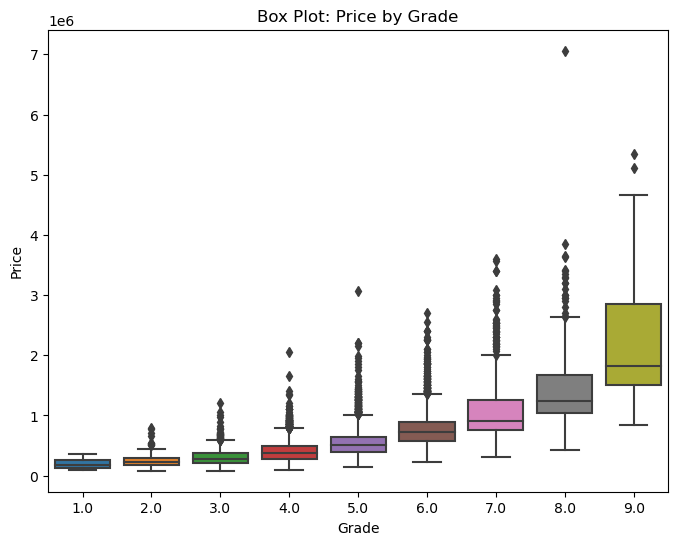

In [50]:
# Create a box plot using Seaborn for grade_encoded
plt.figure(figsize=(8, 6))
sns.boxplot(x='grade_encoded', y='price', data=data)

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Box Plot: Price by Grade')

# Show the plot
plt.show()

plot for string categorical predicators like waterfront and condition 

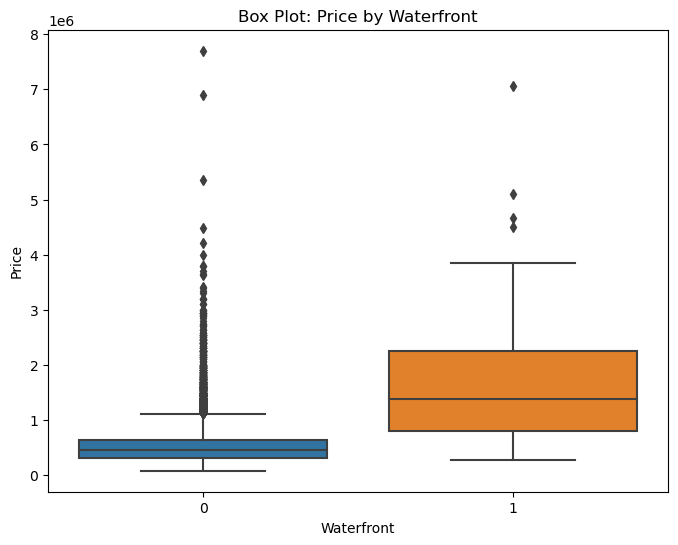

In [53]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=data)

# Set labels and title
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Box Plot: Price by Waterfront')

# Show the plot
plt.show()

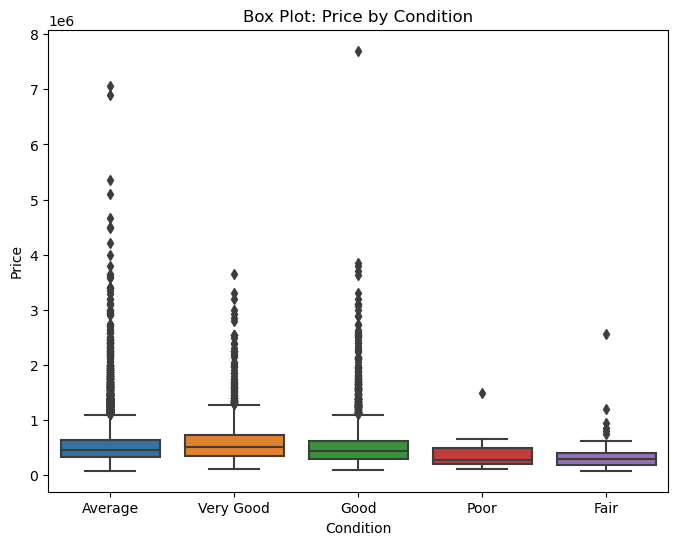

In [54]:
# Create a box plot for condition 
plt.figure(figsize=(8, 6))
sns.boxplot(x='condition', y='price', data=data)

# Set labels and title
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Box Plot: Price by Condition')

# Show the plot
plt.show()

## 2. MODELING

In [33]:
# Prepare the data
X = data[['yr_built_category']]  # Independent variable(s)
y = data['price']  # Dependent variable

# Add constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     120.4
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           6.56e-28
Time:                        01:07:30   Log-Likelihood:            -2.2449e+05
No. Observations:               15762   AIC:                         4.490e+05
Df Residuals:                   15760   BIC:                         4.490e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.684e+05   7274.65